In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [245]:
file = "data/Adventure_works.xlsx"

In [246]:
xls = pd.ExcelFile(file)

sheet_names = xls.sheet_names
sheet_names

['Hoja1']

In [247]:
df = pd.read_excel(xls, sheet_name="Hoja1")

In [248]:
df.head()

,WeekDay,Day,Month,Year,Date,Sales Amount,Sales Order,Channel,Product,Model,Color,SKU,Category,Subcategory,Country-Region,City
0,viernes,31,mayo,2019,2019-05-31,9.99,SO51178,Internet,Mountain Bottle Cage,Mountain Bottle Cage,NaN,BC-M005,Accessories,Bottles and Cages,Germany,Hamburg
1,sábado,1,junio,2019,2019-06-01,9.99,SO51191,Internet,Mountain Bottle Cage,Mountain Bottle Cage,NaN,BC-M005,Accessories,Bottles and Cages,Germany,Berlin
2,domingo,2,junio,2019,2019-06-02,9.99,SO51207,Internet,Mountain Bottle Cage,Mountain Bottle Cage,NaN,BC-M005,Accessories,Bottles and Cages,Germany,Bonn
3,domingo,2,junio,2019,2019-06-02,9.99,SO51205,Internet,Mountain Bottle Cage,Mountain Bottle Cage,NaN,BC-M005,Accessories,Bottles and Cages,United Kingdom,Watford
4,domingo,2,junio,2019,2019-06-02,9.99,SO51206,Internet,Mountain Bottle Cage,Mountain Bottle Cage,NaN,BC-M005,Accessories,Bottles and Cages,United Kingdom,London


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18089 entries, 0 to 18088
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   WeekDay         18089 non-null  object        
 1   Day             18089 non-null  int64         
 2   Month           18089 non-null  object        
 3   Year            18089 non-null  int64         
 4   Date            18089 non-null  datetime64[ns]
 5   Sales Amount    18089 non-null  float64       
 6   Sales Order     18089 non-null  object        
 7   Channel         18089 non-null  object        
 8   Product         18089 non-null  object        
 9   Model           18089 non-null  object        
 10  Color           9730 non-null   object        
 11  SKU             18089 non-null  object        
 12  Category        18089 non-null  object        
 13  Subcategory     18089 non-null  object        
 14  Country-Region  18089 non-null  object        
 15  Ci

In [250]:
df["Product"].value_counts()

Product
Water Bottle - 30 oz.      1228
Road Tire Tube              896
Patch Kit/8 Patches         853
AWC Logo Cap                844
Sport-100 Helmet. Red       784
                           ... 
Mountain-100 Silver. 42      10
Mountain-100 Silver. 44      10
Mountain-100 Black. 38       10
Mountain-100 Black. 48        7
Mountain-100 Silver. 48       6
Name: count, Length: 130, dtype: int64

In [251]:
df["Product"].value_counts(normalize=True) * 100

Product
Water Bottle - 30 oz.      6.788656
Road Tire Tube             4.953287
Patch Kit/8 Patches        4.715573
AWC Logo Cap               4.665819
Sport-100 Helmet. Red      4.334126
                             ...   
Mountain-100 Silver. 42    0.055282
Mountain-100 Silver. 44    0.055282
Mountain-100 Black. 38     0.055282
Mountain-100 Black. 48     0.038698
Mountain-100 Silver. 48    0.033169
Name: proportion, Length: 130, dtype: float64

In [252]:
# Sacamos los principales productos vendidos, luego, agrupamos el resto con la etiqueta "Otros"
product_counts = df["Product"].value_counts()
top_products = product_counts.head(5).reset_index()
top_products.columns = ["Product", "count"]

other_count = pd.DataFrame([{"Product": "Otros", "count": product_counts[5:].sum()}])

summary = pd.concat([top_products, other_count], ignore_index=True)
summary["percentage"] = (summary["count"] / summary["count"].sum()) * 100
summary

,Product,count,percentage
0,Water Bottle - 30 oz.,1228,6.788656
1,Road Tire Tube,896,4.953287
2,Patch Kit/8 Patches,853,4.715573
3,AWC Logo Cap,844,4.665819
4,Sport-100 Helmet. Red,784,4.334126
5,Otros,13484,74.542540


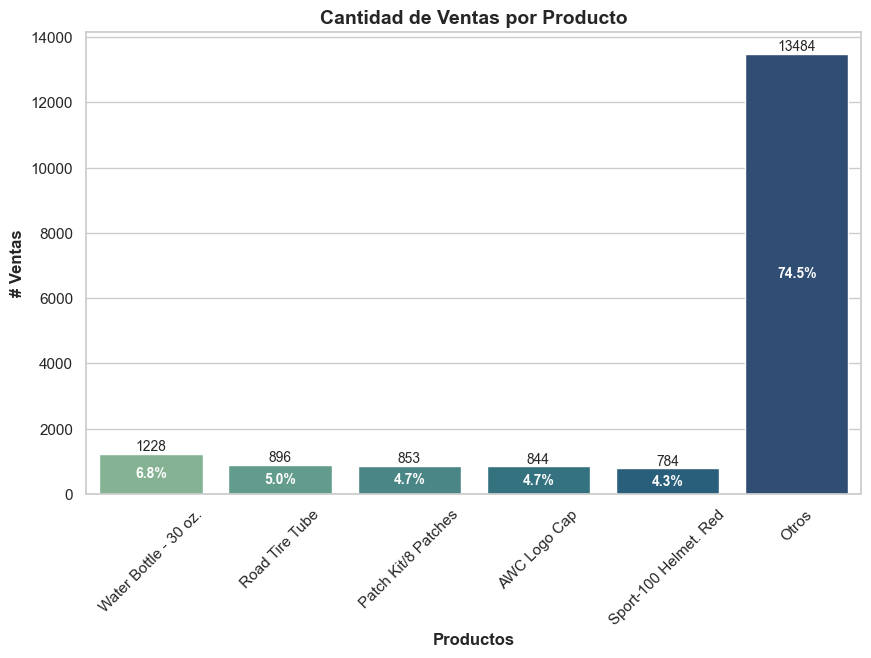

In [265]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(summary, x="Product", y="count", hue="Product", legend=False, palette="crest")

for bar, percentage in zip(ax.patches, summary["percentage"]):
    ax.annotate(f"{percentage:.1f}%",
                (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                ha='center', va='center', fontsize=10, fontweight='bold', color="white")

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xlabel("Productos", fontsize=12, fontweight="bold")
plt.ylabel("# Ventas", fontsize=12, fontweight="bold")
plt.title("Cantidad de Ventas por Producto", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)

plt.show()

In [266]:
# Obtenemos los productos menos vendidos y calculamos los porcentajes
product_counts = df["Product"].value_counts()
bottom_products = product_counts.tail(10).reset_index()
bottom_products.columns = ["Product", "count"]
bottom_products["percentage"] = (bottom_products["count"] / bottom_products["count"].sum()) * 100
bottom_products

,Product,count,percentage
0,Mountain-100 Silver. 38,17,14.782609
1,Mountain-500 Black. 40,15,13.043478
2,Mountain-500 Black. 52,15,13.043478
3,Mountain-100 Black. 44,14,12.173913
4,Mountain-100 Black. 42,11,9.565217
5,Mountain-100 Silver. 42,10,8.695652
6,Mountain-100 Silver. 44,10,8.695652
7,Mountain-100 Black. 38,10,8.695652
8,Mountain-100 Black. 48,7,6.086957
9,Mountain-100 Silver. 48,6,5.217391


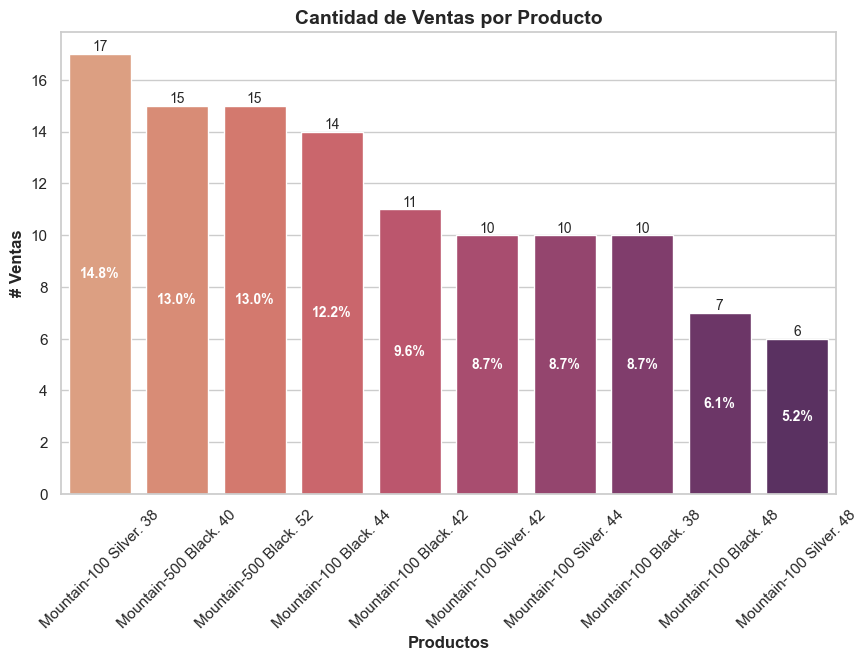

In [267]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(bottom_products, x="Product", y="count", hue="Product", palette="flare", color="red", legend=False)

for bar, percentage in zip(ax.patches, bottom_products["percentage"]):
    ax.annotate(f"{percentage:.1f}%",
                (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                ha='center', va='center', fontsize=10, fontweight='bold', color="white")

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xlabel("Productos", fontsize=12, fontweight="bold")
plt.ylabel("# Ventas", fontsize=12, fontweight="bold")
plt.title("Cantidad de Ventas por Producto", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)

plt.show()

In [278]:
# Mas vendidos
product_counts = df["Product"].value_counts()
top_products = product_counts.head(5).reset_index()
top_products.columns = ["Product", "count"]
top_products["percentage"] = (summary["count"] / summary["count"].sum()) * 100

# Menos vendidos
product_counts = df["Product"].value_counts()
bottom_products = product_counts.tail(5).reset_index()
bottom_products.columns = ["Product", "count"]
bottom_products["percentage"] = (bottom_products["count"] / bottom_products["count"].sum()) * 100

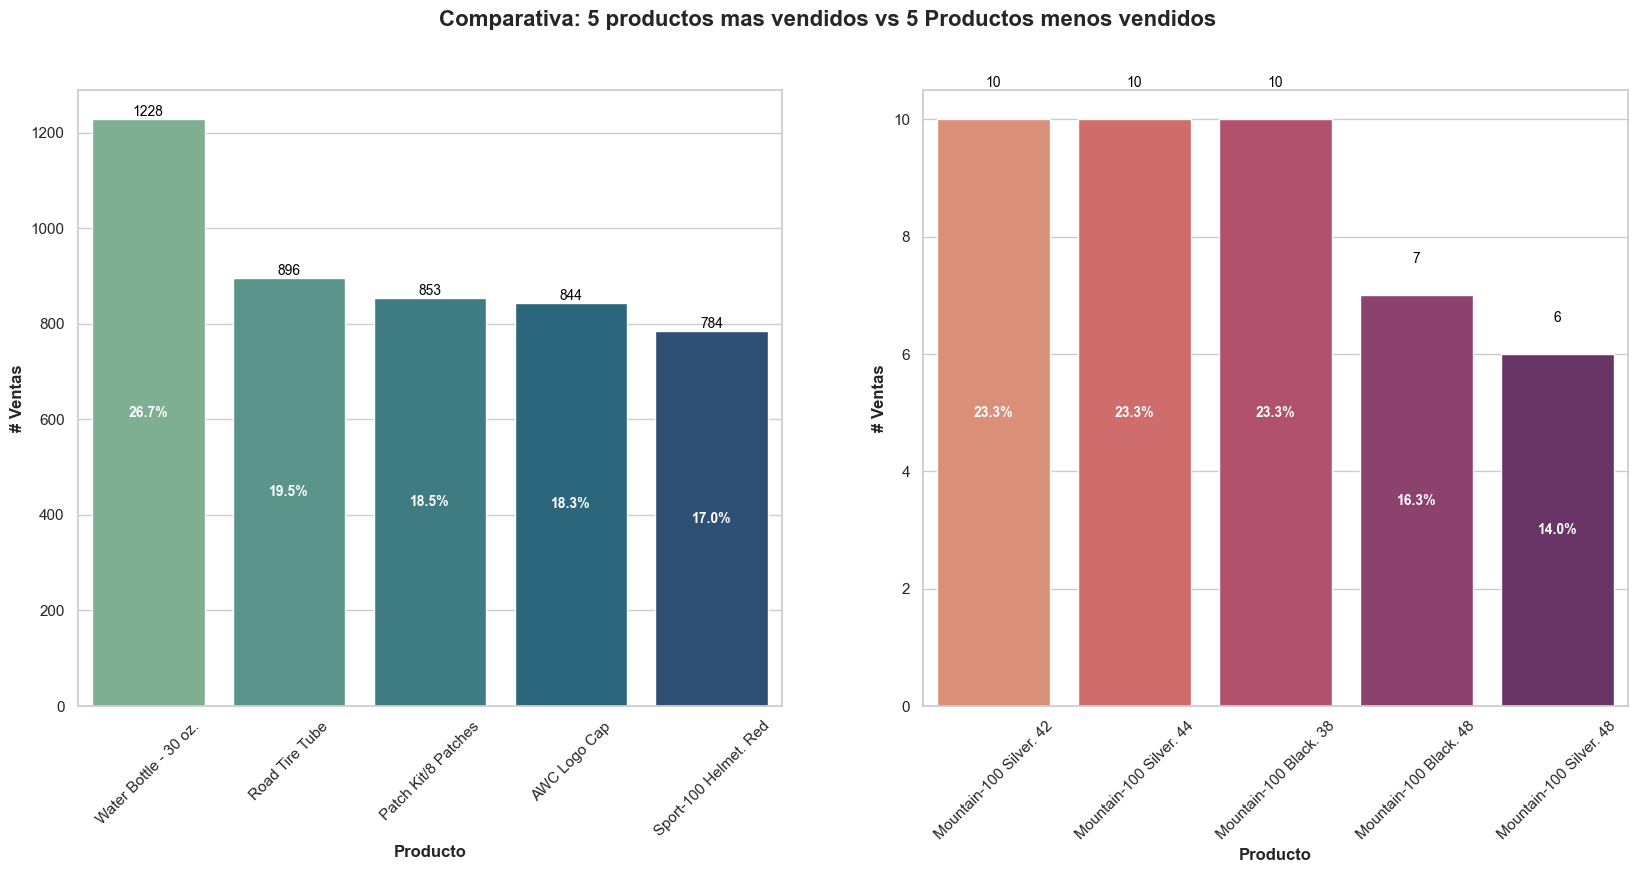

In [289]:
product_counts = df["Product"].value_counts()
top_products = product_counts.head(5).reset_index()
top_products.columns = ["Product", "count"]
top_products["percentage"] = (top_products["count"] / top_products["count"].sum()) * 100

product_counts = df["Product"].value_counts()
bottom_products = product_counts.tail(5).reset_index()
bottom_products.columns = ["Product", "count"]
bottom_products["percentage"] = (bottom_products["count"] / bottom_products["count"].sum()) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(data=top_products, x="Product", y="count", ax=ax1, palette="crest", hue="Product")
ax1.set_xlabel("Producto", fontsize=12, fontweight="bold")
ax1.set_ylabel("# Ventas", fontsize=12, fontweight="bold")
ax1.tick_params(axis='x', rotation=45)

for bar, percentage in zip(ax1.patches, top_products["percentage"]):
    ax1.annotate(f"{percentage:.1f}%",
                 (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                 ha='center', va='center', fontsize=10, fontweight='bold', color="white")

for bar in ax1.patches:
    count = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{int(count)}',
             ha='center', va='bottom', fontsize=10, color='black')

sns.barplot(data=bottom_products, x="Product", y="count", ax=ax2, palette="flare", hue="Product")
ax2.set_xlabel("Producto", fontsize=12, fontweight="bold")
ax2.set_ylabel("# Ventas", fontsize=12, fontweight="bold")
ax2.tick_params(axis='x', rotation=45)

for bar, percentage in zip(ax2.patches, bottom_products["percentage"]):
    ax2.annotate(f"{percentage:.1f}%",
                 (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                 ha='center', va='center', fontsize=10, fontweight='bold', color="white")

for bar in ax2.patches:
    count = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{int(count)}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.suptitle("Comparativa: 5 productos mas vendidos vs 5 Productos menos vendidos", fontsize=16, fontweight="bold")
plt.show()

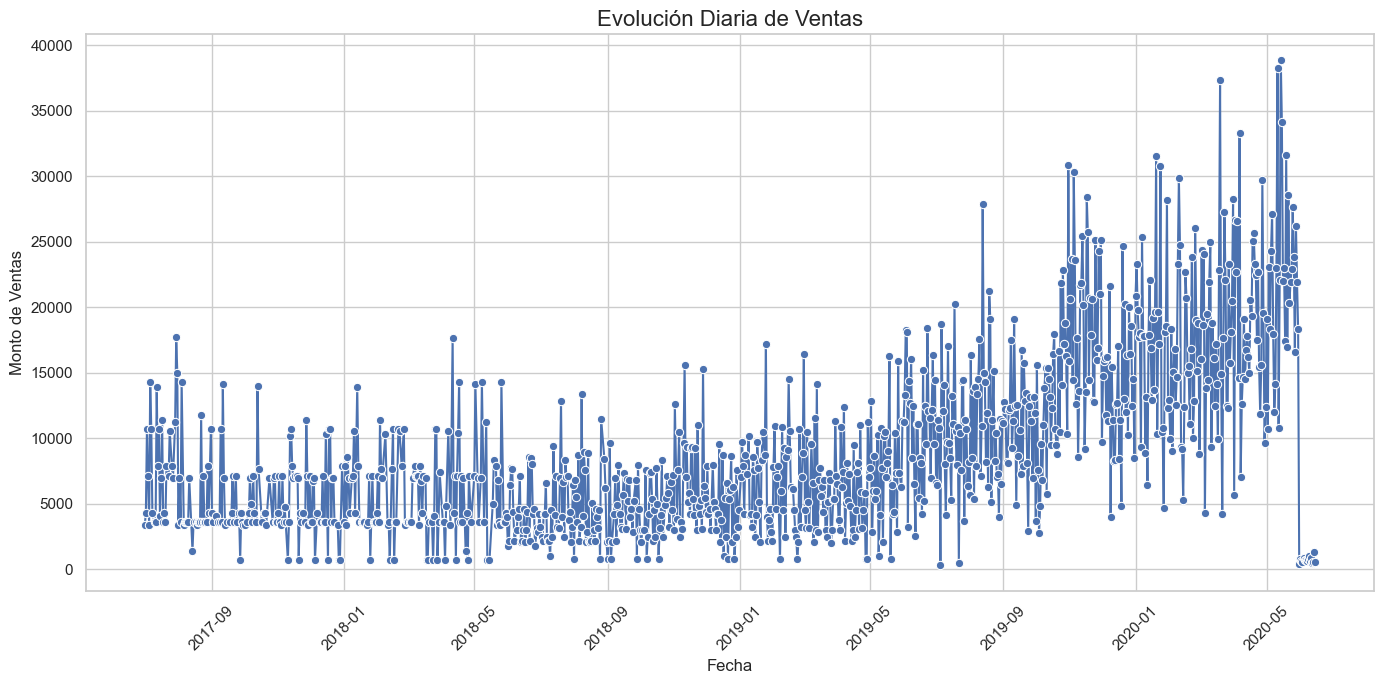

In [298]:
daily_sales = df.groupby('Date')['Sales Amount'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sales, x='Date', y='Sales Amount', marker='o')
plt.title('Evolución Diaria de Ventas', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Monto de Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

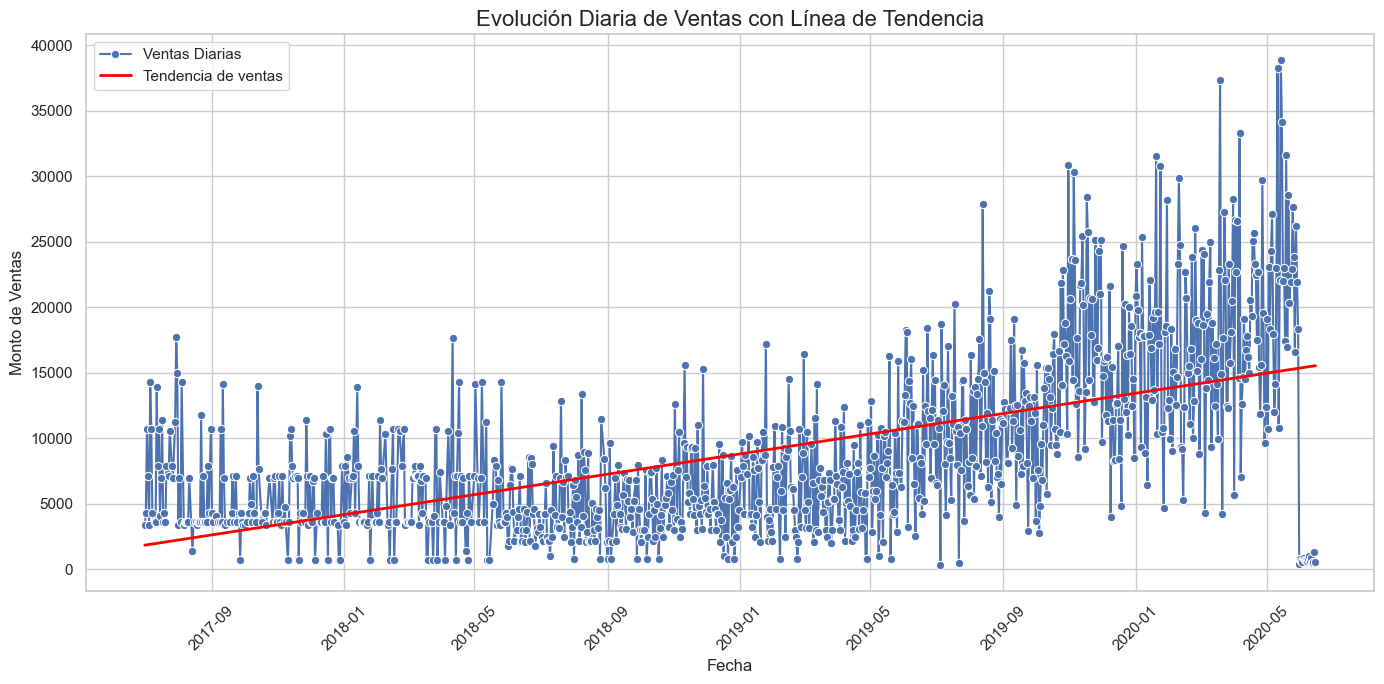

In [302]:
daily_sales = df.groupby('Date')['Sales Amount'].sum().reset_index()

daily_sales['Date_ordinal'] = daily_sales['Date'].apply(lambda x: x.toordinal())

slope, intercept = np.polyfit(daily_sales['Date_ordinal'], daily_sales['Sales Amount'], 1)
daily_sales['Trend'] = daily_sales['Date_ordinal'] * slope + intercept

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sales, x='Date', y='Sales Amount', marker='o', label='Ventas Diarias')
sns.lineplot(data=daily_sales, x='Date', y='Trend', color='red', label='Tendencia de ventas', linewidth=2)

plt.title('Evolución Diaria de Ventas con Línea de Tendencia', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Monto de Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

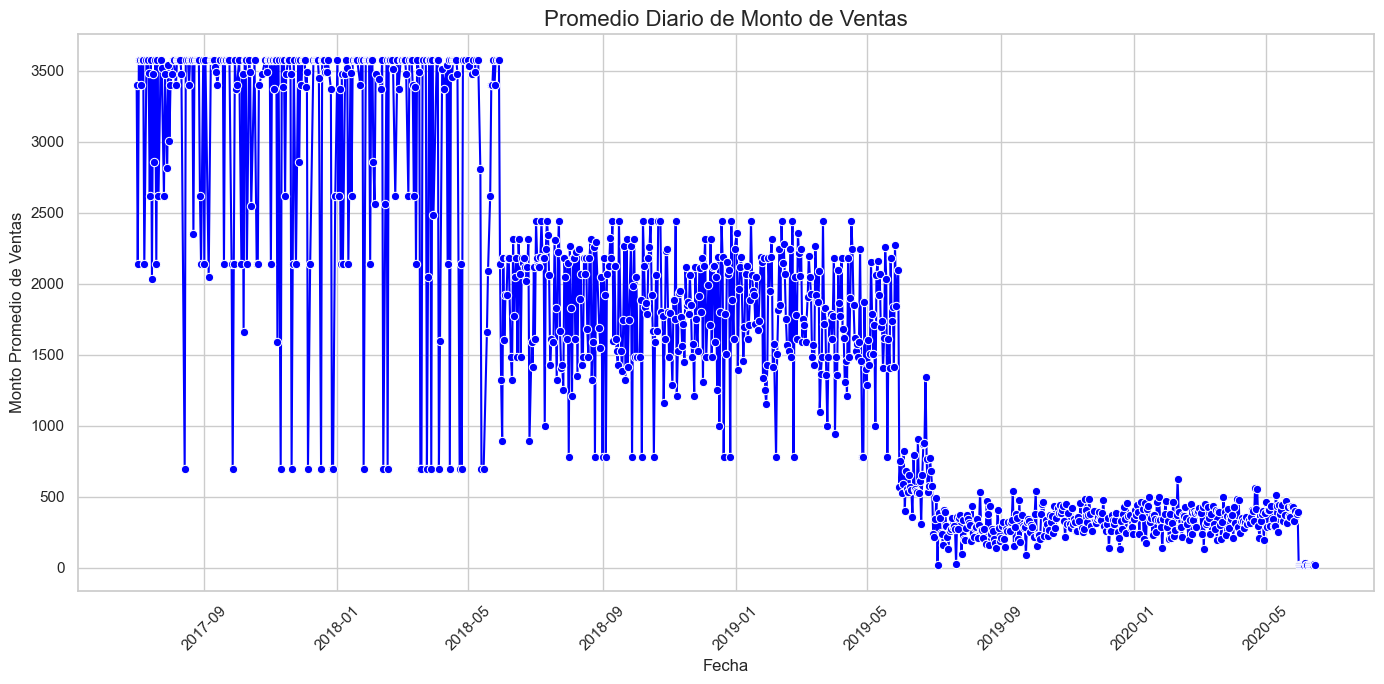

In [311]:
daily_avg_sales = df.groupby('Date')['Sales Amount'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_avg_sales, x='Date', y='Sales Amount', marker='o', color='blue')
plt.title('Promedio Diario de Monto de Ventas', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Monto Promedio de Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [319]:
df.head()

,WeekDay,Day,Month,Year,Date,Sales Amount,Sales Order,Channel,Product,Model,Color,SKU,Category,Subcategory,Country-Region,City
0,viernes,31,mayo,2019,2019-05-31,9.99,SO51178,Internet,Mountain Bottle Cage,Mountain Bottle Cage,NaN,BC-M005,Accessories,Bottles and Cages,Germany,Hamburg
1,sábado,1,junio,2019,2019-06-01,9.99,SO51191,Internet,Mountain Bottle Cage,Mountain Bottle Cage,NaN,BC-M005,Accessories,Bottles and Cages,Germany,Berlin
2,domingo,2,junio,2019,2019-06-02,9.99,SO51207,Internet,Mountain Bottle Cage,Mountain Bottle Cage,NaN,BC-M005,Accessories,Bottles and Cages,Germany,Bonn
3,domingo,2,junio,2019,2019-06-02,9.99,SO51205,Internet,Mountain Bottle Cage,Mountain Bottle Cage,NaN,BC-M005,Accessories,Bottles and Cages,United Kingdom,Watford
4,domingo,2,junio,2019,2019-06-02,9.99,SO51206,Internet,Mountain Bottle Cage,Mountain Bottle Cage,NaN,BC-M005,Accessories,Bottles and Cages,United Kingdom,London


In [329]:
categories_counts = df["Category"].value_counts()
categories_counts.columns = ["Category", "count"]
categories_counts

Category
Accessories    10674
Bikes           4902
Clothing        2513
Name: count, dtype: int64

In [351]:
countries_counts = df["Country-Region"].value_counts().reset_index()
countries_counts.columns = ["Country", "count"]
countries_counts

,Country,count
0,United Kingdom,6906
1,Germany,5625
2,France,5558


In [352]:
country_sales = df.groupby('Country-Region')['Sales Amount'].sum().reset_index()
country_sales.columns = ['Country', 'Total Sales']

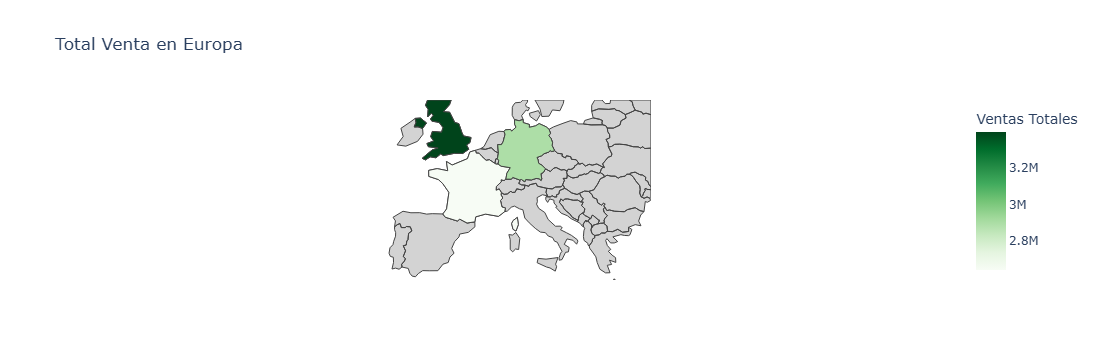

In [357]:
fig = px.choropleth(country_sales,
                     locations="Country",
                     locationmode="country names",
                     color="Total Sales",
                     color_continuous_scale="greens",
                     title="Total Venta en Europa",
                     labels={"Total Sales": "Ventas Totales"})

fig.update_geos(
    scope="europe", 
    projection=dict(type="natural earth"),
    showland=True,
    landcolor="lightgray",
)

fig.show()

In [398]:
import plotly.express as px

fig = px.scatter_geo(
    countries_counts,
    locations="Country",
    locationmode="country names",
    color="count",
    color_continuous_scale="greens",
    title="# Ventas en Europa",
    labels={"count": "# count"},
    size="count"
)

# Ajusta la posición del texto (por ejemplo, 'top center')
fig.update_traces(textposition="top center")

fig.update_geos(
    scope="europe", 
    projection=dict(type="natural earth"),
    showland=True,
    landcolor="lightgray"
)

fig.show()

In [381]:
year_counts = df["Year"].value_counts().reset_index()
year_counts.columns = ["Year", "count"]
year_counts

,Year,count
0,2019,8768
1,2020,8282
2,2018,771
3,2017,268


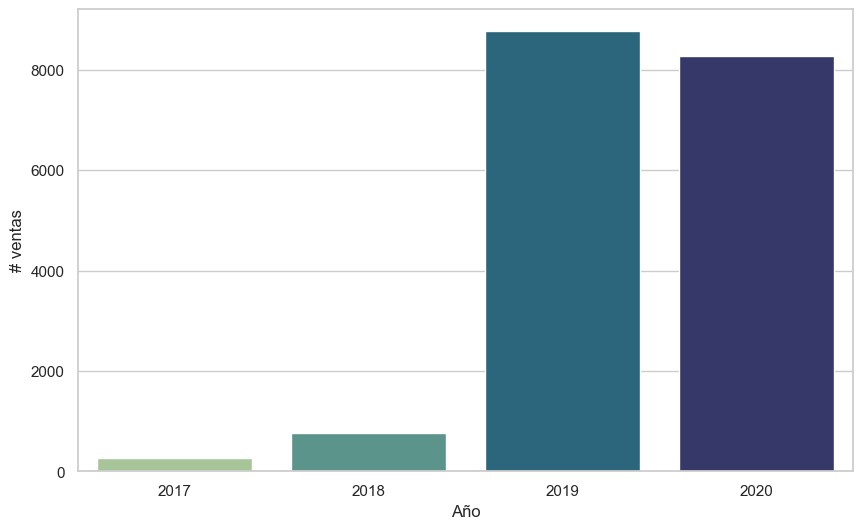

In [383]:
plt.figure(figsize=(10, 6))
sns.barplot(year_counts, x="Year", y="count", hue="Year", palette="crest", legend=False)
plt.xlabel('Año')
plt.ylabel("# ventas")
plt.show()

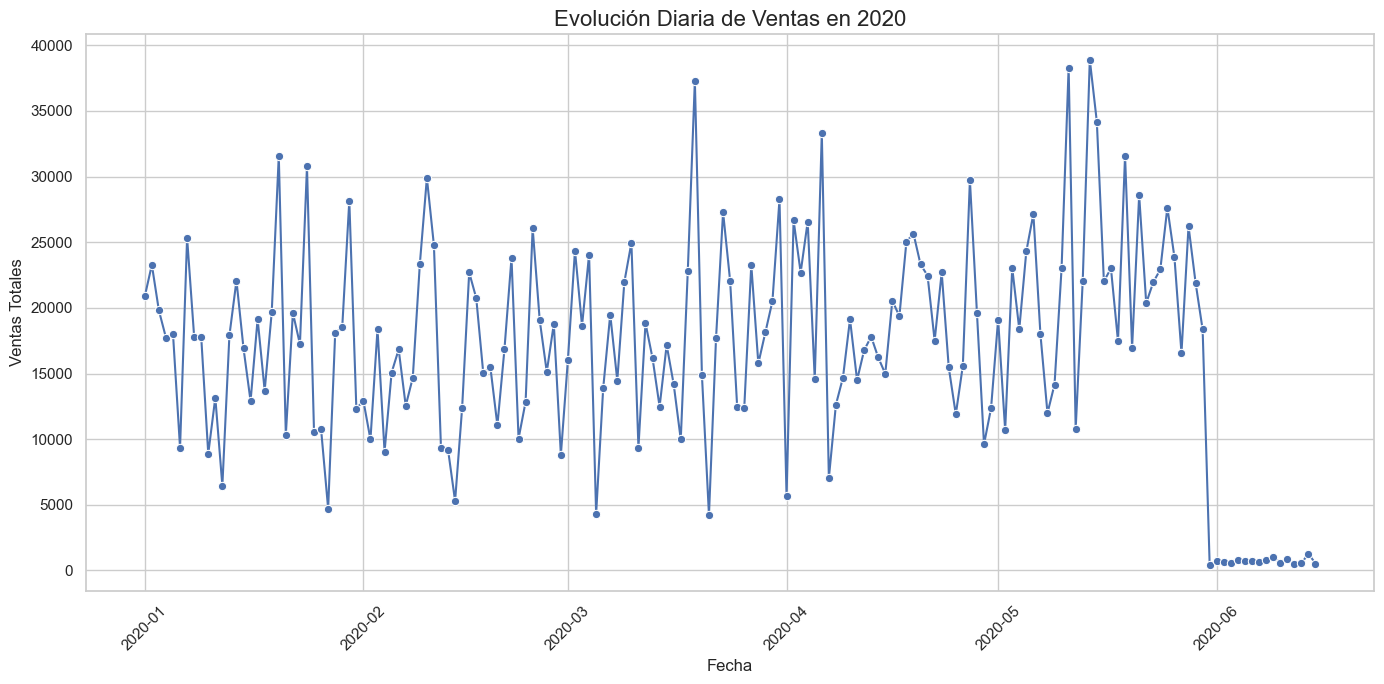

In [378]:
sales_2020 = df[df['Year'] == 2020].groupby('Date')['Sales Amount'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_2020, x='Date', y='Sales Amount', marker='o')
plt.title('Evolución Diaria de Ventas en 2020', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()